This notebook will be mainly used for the capstone project

# 1. Introduction

Road accidents have become very common nowadays. As more and people are buying automobiles, the incidences of road accidents are just increasing day by day. 

As per WHO observatory data “Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally and are predicted to become the seventh leading cause of death by 2030”.

Analyzing an important array of factors, including weather conditions, speed, construction work, special events, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These perceptions, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accident can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Other attentive private companies could be investing in technologies aiming to improve road safeness.


# 2. Data

The data comes from [Seattle car accident set](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv). A comprehensive dataset of 194,673 accidents occuring between 2004-2020. The dataset has 38 columns describing the details of each accident including the weather conditions, collision type, date/time of accisent and location.

Location,Weather,Lighting, type of intersection, road conditions, collision condition, drunk and driver and other information described in the dataset.

The following features are selected for the prediction

|Feature|Description|
|:--------|:-----------|
|INATTENTIONIND|Whether or not accident was due to inattention (Y/N)|
|UNDERINFL|Whether or not driver was in drug or alcohol (Y/N) |
|WEATHER|Weather condition|
|ROADCOND|Condition of the road|
|LIGHTCOND|Condition of the light|
|SPEEDING|Whether or not Speeding was a factor (Y/N)|


2.1 Pre-Processing 

The models aim was to predict the severity of an accident, considering that, the variable of Severity Code was in the form of 1 (Property Damage Only) and 2 (Injury Collision).

Featured data are pre processed to convert into continuous data. Encode accident was due to attention with 0 as No and 1 as Yes. Road conditions can be segregate into dry, mushy and wet. Dry as 0, Mushy as 1 and Wet as 2. Ice,Standing Water and oil are similar to wet then it encode as 2. Snow/Slush and Sand/Mud/Dirt are encode as 1. There are few data with 'Others', So it encode as 'Unknown'. Weather conditions are encode like clear as 0, Overcast and Cloudy as 1, Windy as 2 and Rain as 3. Light conditions are encode like Light as 0, Medium as 1 and Dark asa 2. Encoding under the influence No as 0 and Yes as 1.


2.2 Cleaning

Data cleaning is the process of detecting and removing the inaccurate values from the data set. Here to remove Unknown or Other values from the data set. The entire process of cleansing data to reduce almost 5000 records which is having incorrect data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_06a7a5ea9a3949e3b54b01392e5e7cd1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HKa_G6J6KDGfqxFtIt8bJ3W_pxPa00oeUzueDWccZrEM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_06a7a5ea9a3949e3b54b01392e5e7cd1.get_object(Bucket='ibmdatascience-donotdelete-pr-oldyr2zr8tgsuk',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Importing Data

In [3]:
descriptive_stats = data.describe(include='all')
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


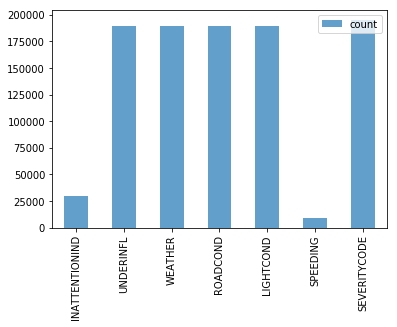

In [4]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()
descriptive_stats_plot.plot(kind='bar',alpha=0.70)




In [ ]:
data['SEVERITYCODE'].plot(kind='bar')

In [5]:
import datetime as dt
data['Date'] = pd.to_datetime(data['INCDATE'])
data['Year'] = data['Date'].dt.year
data['Month'] =  data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday

In [6]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Date,Year,Month,Weekday
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,10,Entering at angle,0,0,N,2013-03-27 00:00:00+00:00,2013,3,2
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,11,From same direction - both going straight - bo...,0,0,N,2006-12-20 00:00:00+00:00,2006,12,2
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,32,One parked--one moving,0,0,N,2004-11-18 00:00:00+00:00,2004,11,3
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,23,From same direction - all others,0,0,N,2013-03-29 00:00:00+00:00,2013,3,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,10,Entering at angle,0,0,N,2004-01-28 00:00:00+00:00,2004,1,2


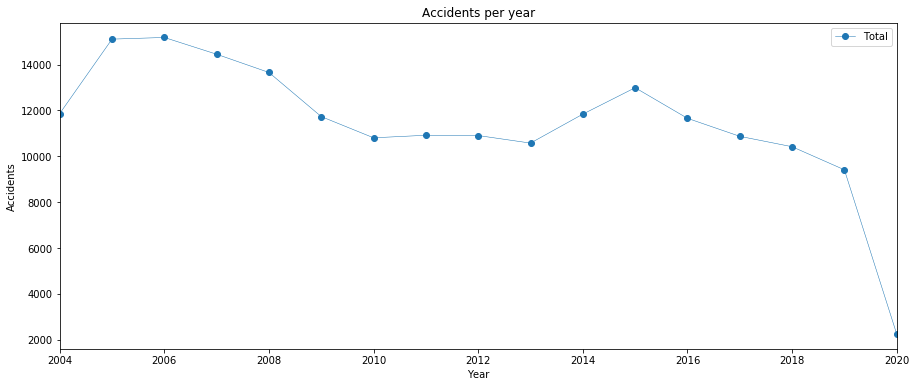

In [7]:
yearly_df = data[["Year","INCKEY"]].groupby("Year").count()
yearly_df['INCKEY'].plot.line(figsize=(15,6),marker='o',linewidth=0.5,label='Total')
plt.title("Accidents per year")
plt.ylabel("Accidents")
plt.legend()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


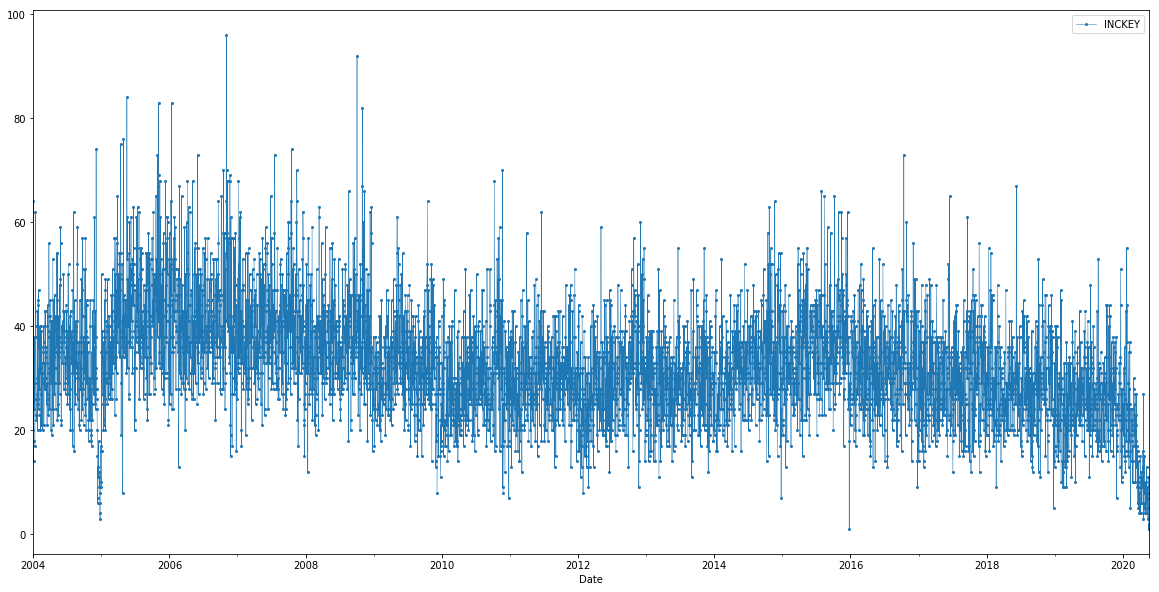

In [8]:

date_df = data[['Date','INCKEY']].groupby('Date').count()
date_df.plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')

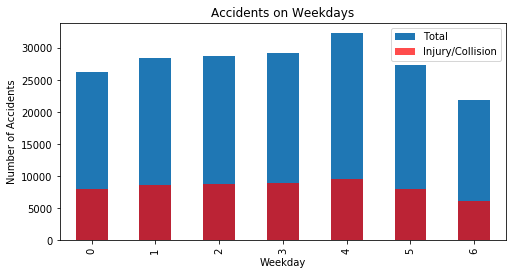

In [9]:
#cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#Weekday_df = data[["Weekday","INCKEY"]].groupby("Weekday").count().reindex(cats)
Weekday_df = data[["Weekday","INCKEY"]].groupby("Weekday").count()
Weekday_df['severity_2'] = data.loc[data['SEVERITYCODE'] == 2][["Weekday","INCKEY"]].groupby("Weekday").count()
Weekday_df['INCKEY'].plot(kind='bar',figsize=(8,4),label='Total')
Weekday_df['severity_2'].plot(kind='bar',color='r',alpha=0.7,label='Injury/Collision')
plt.title("Accidents on Weekdays")
plt.ylabel("Number of Accidents")
plt.legend()

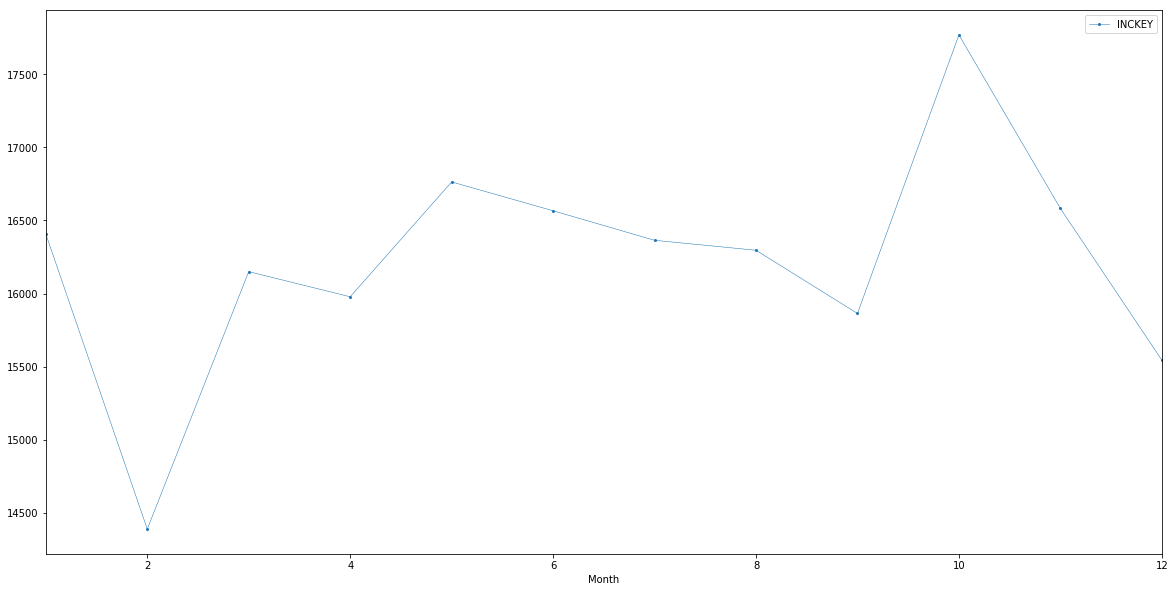

In [10]:
month_df = data[['Month','INCKEY']].groupby('Month').count()
month_df.plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Monthly trend')

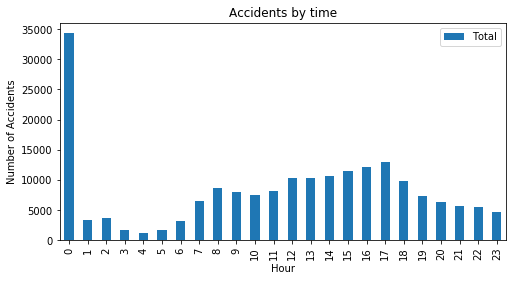

In [11]:
data['Hour'] = pd.to_datetime(data['INCDTTM']).dt.hour

hr_df = data[['Hour','INCKEY']].groupby('Hour').count()
hr_df['INCKEY'].plot(kind='bar',figsize=(8,4),label='Total')
plt.title("Accidents by time")
plt.ylabel("Number of Accidents")
plt.legend()

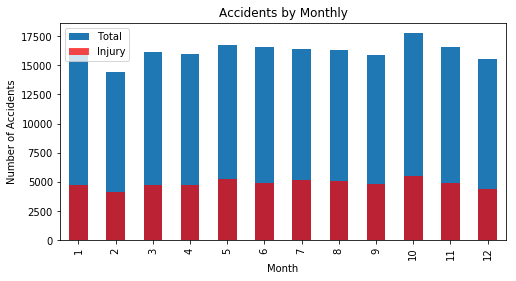

In [12]:
m_df = data[['Month','INCKEY']].groupby('Month').count()
m_df['severity_2'] = data.loc[data['SEVERITYCODE'] == 2][["Month","INCKEY"]].groupby("Month").count()
m_df['INCKEY'].plot(kind='bar',figsize=(8,4),label='Total')
m_df['severity_2'].plot(kind='bar',color='r',alpha=0.7,label='Injury')
plt.title("Accidents by Monthly")
plt.ylabel("Number of Accidents")
plt.legend()

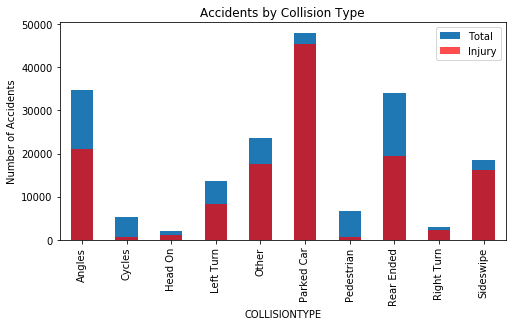

In [13]:
c_df = data[['COLLISIONTYPE','INCKEY']].groupby('COLLISIONTYPE').count()
c_df['severity_2'] = data.loc[data['SEVERITYCODE'] == 1][["COLLISIONTYPE","INCKEY"]].groupby("COLLISIONTYPE").count()
c_df['INCKEY'].plot(kind='bar',figsize=(8,4),label='Total')
c_df['severity_2'].plot(kind='bar',color='r',alpha=0.7,label='Injury')
plt.title("Accidents by Collision Type")
plt.ylabel("Number of Accidents")
plt.legend()

In [14]:
data.loc[data['SEVERITYCODE'] == 2][["Weekday","INCKEY"]].groupby("Weekday").count()

,INCKEY
Weekday,
0,7973
1,8731
2,8757
3,9018
4,9559
5,8047
6,6103


## Data Pre-processing

In [15]:
#SEVERITYCODE 0 = 1 (Property Damage Only) and 1 = 2 (Injury/Collision).
#data['SEVERITYCODE'].replace(1,0,inplace=True)
#data['SEVERITYCODE'].replace(2,1,inplace=True)



In [16]:
# attention 0 = No 1 = Yes
data['INATTENTIONIND'].replace("Y",1,inplace=True)
data['INATTENTIONIND'].replace(np.nan,0,inplace=True)

# under the influence 0 = No 1 = Yes
data["UNDERINFL"].replace("N", 0, inplace=True)
data["UNDERINFL"].replace("Y", 1, inplace=True)
data["UNDERINFL"].replace("0", 0, inplace=True)
data["UNDERINFL"].replace("1", 1, inplace=True)

# Weather Conditions 0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
data["WEATHER"].replace("Clear", 0, inplace=True)
data["WEATHER"].replace("Raining", 3, inplace=True)
data["WEATHER"].replace("Overcast", 1, inplace=True)
data["WEATHER"].replace("Other", "Unknown", inplace=True)
data["WEATHER"].replace("Snowing", 3, inplace=True)
data["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
data["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
data["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
data["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
data["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

# Road Conditions 0 = Dry, 1 = Mushy, 2 = Wet
data["ROADCOND"].replace("Dry", 0, inplace=True)
data["ROADCOND"].replace("Wet", 2, inplace=True)
data["ROADCOND"].replace("Ice", 2, inplace=True)
data["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
data["ROADCOND"].replace("Other", "Unknown", inplace=True)
data["ROADCOND"].replace("Standing Water", 2, inplace=True)
data["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
data["ROADCOND"].replace("Oil", 2, inplace=True)

#Light Conditions 0 = Light, 1 = Medium, 2 = Dark
data["LIGHTCOND"].replace("Daylight", 0, inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
data["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
data["LIGHTCOND"].replace("Dusk", 1, inplace=True)
data["LIGHTCOND"].replace("Dawn", 1, inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
data["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
data["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Speeding 0 = No, 1 = Yes
data["SPEEDING"].replace("Y", 1, inplace=True)
data["SPEEDING"].replace(np.nan, 0, inplace=True)

In [17]:
#Accident Location Block=0, Intersection =1, Alley=2
data["ADDRTYPE"].replace("Intersection", 1, inplace=True)
data["ADDRTYPE"].replace('Block', 0, inplace=True)
data["ADDRTYPE"].replace('Alley', 2, inplace=True)

#Collisiontype
data["COLLISIONTYPE"].replace('Parked Car', 1, inplace=True)
data["COLLISIONTYPE"].replace('Angles', 2, inplace=True)
data["COLLISIONTYPE"].replace('Rear Ended', 3, inplace=True)
data["COLLISIONTYPE"].replace('Sideswipe', 4, inplace=True)
data["COLLISIONTYPE"].replace('Left Turn', 5, inplace=True)
data["COLLISIONTYPE"].replace('Pedestrian', 6, inplace=True)
data["COLLISIONTYPE"].replace('Cycles', 7, inplace=True)
data["COLLISIONTYPE"].replace('Right Turn', 8, inplace=True)
data["COLLISIONTYPE"].replace('Head On', 9, inplace=True)
data["COLLISIONTYPE"].replace('Other', 10, inplace=True)

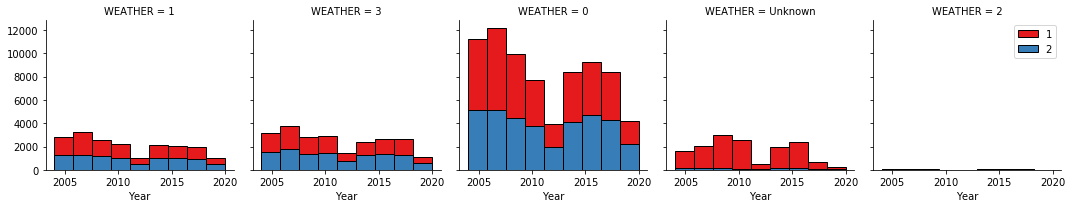

In [18]:
import seaborn as sns
import numpy as np
bins = np.linspace(data.Year.min(),data.Year.max(),10)
g = sns.FacetGrid(data,col='WEATHER',hue='SEVERITYCODE',palette="Set1",col_wrap=5)
g.map(plt.hist,'Year',bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

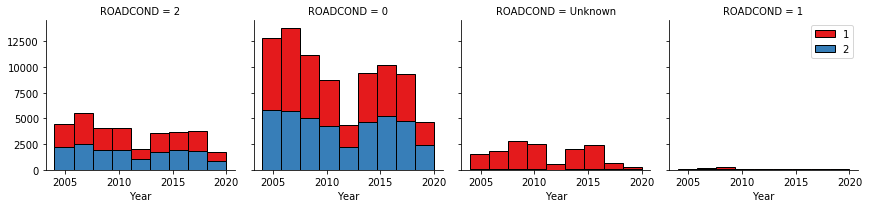

In [19]:
bins = np.linspace(data.Year.min(),data.Year.max(),10)
g = sns.FacetGrid(data,col='ROADCOND',hue='SEVERITYCODE',palette="Set1",col_wrap=5)
g.map(plt.hist,'Year',bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

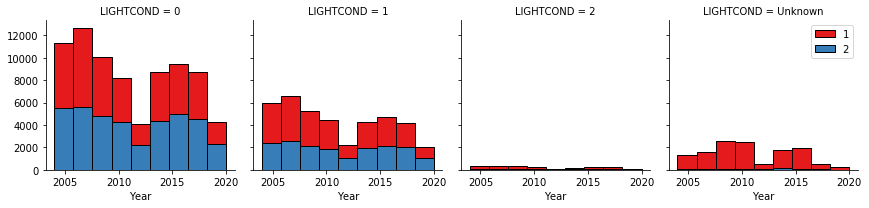

In [20]:
bins = np.linspace(data.Year.min(),data.Year.max(),10)
g = sns.FacetGrid(data,col='LIGHTCOND',hue='SEVERITYCODE',palette="Set1",col_wrap=5)
g.map(plt.hist,'Year',bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

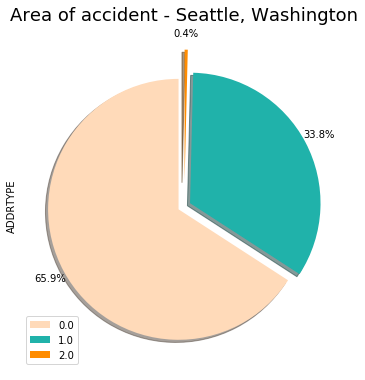

In [21]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=data['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(10, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [22]:
# feature selection
feature_data = data[['SEVERITYCODE',"X","Y","INCKEY",'INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','Hour','Weekday','ADDRTYPE','PERSONCOUNT','PEDCOUNT','COLLISIONTYPE']]
feature_data.shape

(194673, 16)

In [23]:
feature_data.head()

,SEVERITYCODE,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Hour,Weekday,ADDRTYPE,PERSONCOUNT,PEDCOUNT,COLLISIONTYPE
0,2,-122.323148,47.703140,1307,0.0,0.0,1,2,0,0.0,14,2,1.0,2,0,2.0
1,1,-122.347294,47.647172,52200,0.0,0.0,3,2,1,0.0,18,2,0.0,2,0,4.0
2,1,-122.334540,47.607871,26700,0.0,0.0,1,0,0,0.0,10,3,0.0,4,0,1.0
3,1,-122.334803,47.604803,1144,0.0,0.0,0,0,0,0.0,9,4,0.0,3,0,10.0
4,2,-122.306426,47.545739,17700,0.0,0.0,3,2,0,0.0,8,2,1.0,2,0,2.0


In [24]:
print("Missing values in Light Condition" , data['LIGHTCOND'].isna().sum(),"\n"
"Missing values in Weather Condition " , data['WEATHER'].isna().sum(),"\n"
"Missing values in Road Condition " , data['ROADCOND'].isna().sum(),"\n"
"Missing values in Under Influence " , data['UNDERINFL'].isna().sum(),"\n"      
     )

Missing values in Light Condition 5170 
Missing values in Weather Condition  5081 
Missing values in Road Condition  5012 
Missing values in Under Influence  4884 



Text(0, 0.5, 'Number of Accident')

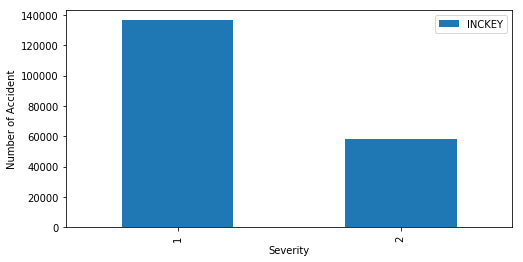

In [25]:
severity_data = feature_data[["SEVERITYCODE","INCKEY"]].groupby('SEVERITYCODE').count()
severity_data.plot(kind='bar',figsize=(8,4))
plt.xlabel("Severity")
plt.ylabel("Number of Accident")

In [26]:
df = feature_data.copy()
df.head()

,SEVERITYCODE,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Hour,Weekday,ADDRTYPE,PERSONCOUNT,PEDCOUNT,COLLISIONTYPE
0,2,-122.323148,47.703140,1307,0.0,0.0,1,2,0,0.0,14,2,1.0,2,0,2.0
1,1,-122.347294,47.647172,52200,0.0,0.0,3,2,1,0.0,18,2,0.0,2,0,4.0
2,1,-122.334540,47.607871,26700,0.0,0.0,1,0,0,0.0,10,3,0.0,4,0,1.0
3,1,-122.334803,47.604803,1144,0.0,0.0,0,0,0,0.0,9,4,0.0,3,0,10.0
4,2,-122.306426,47.545739,17700,0.0,0.0,3,2,0,0.0,8,2,1.0,2,0,2.0


In [27]:
df.dropna(axis=0,inplace=True)
df.head()

,SEVERITYCODE,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Hour,Weekday,ADDRTYPE,PERSONCOUNT,PEDCOUNT,COLLISIONTYPE
0,2,-122.323148,47.703140,1307,0.0,0.0,1,2,0,0.0,14,2,1.0,2,0,2.0
1,1,-122.347294,47.647172,52200,0.0,0.0,3,2,1,0.0,18,2,0.0,2,0,4.0
2,1,-122.334540,47.607871,26700,0.0,0.0,1,0,0,0.0,10,3,0.0,4,0,1.0
3,1,-122.334803,47.604803,1144,0.0,0.0,0,0,0,0.0,9,4,0.0,3,0,10.0
4,2,-122.306426,47.545739,17700,0.0,0.0,3,2,0,0.0,8,2,1.0,2,0,2.0


In [28]:

print(np.count_nonzero(df['UNDERINFL']))
df.describe()

8858


,SEVERITYCODE,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,SPEEDING,Hour,Weekday,ADDRTYPE,PERSONCOUNT,PEDCOUNT,COLLISIONTYPE
count,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000,184146.000000
mean,1.304107,-122.330501,47.619546,138369.061717,0.158010,0.048103,0.047278,11.466608,2.943154,0.342820,2.468085,0.038850,3.767380
std,0.460029,0.030018,0.056216,85495.815181,0.364752,0.213985,0.212233,6.926314,1.922681,0.474653,1.358666,0.202567,2.910475
min,1.000000,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,-122.348839,47.575884,68866.250000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,2.000000,0.000000,1.000000
50%,1.000000,-122.330168,47.615361,120476.500000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,-122.311922,47.663835,199218.750000,0.000000,0.000000,0.000000,17.000000,5.000000,1.000000,3.000000,0.000000,5.000000
max,2.000000,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000,23.000000,6.000000,1.000000,81.000000,6.000000,10.000000


In [29]:
#weather

unknownWeather = df['WEATHER'] == 'Unknown'
weather = df['WEATHER'].values
weather = weather[unknownWeather]
weather[0:10101]=0
weather[10101:12583]=1
weather[12583:12622]=2
weather[12622:14611]=3

df.loc[df['WEATHER'] =='Unknown','WEATHER']=weather
df["WEATHER"]=df["WEATHER"].astype(int)

#Road Condition
unknownRoadcond = df['ROADCOND'] == 'Unknown'
roadcond = df['ROADCOND'].values
roadcond = roadcond[unknownRoadcond]
roadcond[0:10000]=0
roadcond[10000:10083]=1
roadcond[10083:13911]=2

df.loc[df['ROADCOND'] =='Unknown','ROADCOND']=roadcond
df["ROADCOND"]=df["ROADCOND"].astype(int)

#Light Condition
unknownLightcond = df['LIGHTCOND'] == 'Unknown'
lightcond  = df['LIGHTCOND'].values
lightcond  = lightcond[unknownLightcond]
lightcond [0:9050]=0
lightcond [9050:12203]=1
lightcond [12203:12604]=2

df.loc[df['LIGHTCOND'] =='Unknown','LIGHTCOND']=lightcond 
df["LIGHTCOND"]=df["LIGHTCOND"].astype(int)

In [30]:
df["SEVERITYCODE"]=df["SEVERITYCODE"].astype(int)
df["COLLISIONTYPE"]=df["COLLISIONTYPE"].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184146 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE      184146 non-null int64
X                 184146 non-null float64
Y                 184146 non-null float64
INCKEY            184146 non-null int64
INATTENTIONIND    184146 non-null float64
UNDERINFL         184146 non-null float64
WEATHER           184146 non-null int64
ROADCOND          184146 non-null int64
LIGHTCOND         184146 non-null int64
SPEEDING          184146 non-null float64
Hour              184146 non-null int64
Weekday           184146 non-null int64
ADDRTYPE          184146 non-null float64
PERSONCOUNT       184146 non-null int64
PEDCOUNT          184146 non-null int64
COLLISIONTYPE     184146 non-null int64
dtypes: float64(6), int64(10)
memory usage: 23.9 MB


In [32]:
#conda install -c anaconda seaborn -y

In [33]:
df['LIGHTCOND'].value_counts()

0    122559
1     58583
2      3004
Name: LIGHTCOND, dtype: int64

In [34]:
df['LIGHTCOND'].value_counts()

0    122559
1     58583
2      3004
Name: LIGHTCOND, dtype: int64

## Feature Selection


In [35]:
from sklearn import preprocessing
feature = df[['INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','Weekday','ADDRTYPE','PERSONCOUNT','PEDCOUNT','COLLISIONTYPE']]
feature.head()

,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,Weekday,ADDRTYPE,PERSONCOUNT,PEDCOUNT,COLLISIONTYPE
0,0.0,0.0,1,2,0,0.0,2,1.0,2,0,2
1,0.0,0.0,3,2,1,0.0,2,0.0,2,0,4
2,0.0,0.0,1,0,0,0.0,3,0.0,4,0,1
3,0.0,0.0,0,0,0,0.0,4,0.0,3,0,10
4,0.0,0.0,3,2,0,0.0,2,1.0,2,0,2


In [36]:
X = feature.values
y = df['SEVERITYCODE'].values
X[0:5]

array([[ 0.,  0.,  1.,  2.,  0.,  0.,  2.,  1.,  2.,  0.,  2.],
       [ 0.,  0.,  3.,  2.,  1.,  0.,  2.,  0.,  2.,  0.,  4.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  3.,  0.,  4.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  3.,  0., 10.],
       [ 0.,  0.,  3.,  2.,  0.,  0.,  2.,  1.,  2.,  0.,  2.]])

In [37]:
y[0:5]

array([2, 1, 1, 1, 2])

## Normalize Data

In [38]:
XNorm = preprocessing.StandardScaler().fit(X).transform(X)
XNorm[0:5]

array([[-0.43320117, -0.22479764,  0.22671186,  1.60633608, -0.68742909,
        -0.22276401, -0.49054241,  1.38455029, -0.344519  , -0.19178728,
        -0.60724966],
       [-0.43320117, -0.22479764,  1.95437364,  1.60633608,  1.27239994,
        -0.22276401, -0.49054241, -0.72225618, -0.344519  , -0.19178728,
         0.07992523],
       [-0.43320117, -0.22479764,  0.22671186, -0.62729953, -0.68742909,
        -0.22276401,  0.0295662 , -0.72225618,  1.12751673, -0.19178728,
        -0.95083711],
       [-0.43320117, -0.22479764, -0.63711902, -0.62729953, -0.68742909,
        -0.22276401,  0.5496748 , -0.72225618,  0.39149886, -0.19178728,
         2.14144992],
       [-0.43320117, -0.22479764,  1.95437364,  1.60633608, -0.68742909,
        -0.22276401, -0.49054241,  1.38455029, -0.344519  , -0.19178728,
        -0.60724966]])

In [39]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=4)

In [40]:
#Normalize Data split
train_xNorm,test_xNorm,train_y1,test_y1 = train_test_split(XNorm,y,test_size=0.2,random_state=4)

## Model Selection

In [41]:
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [43]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.001, solver='liblinear').fit(train_x,train_y)

yhat_LR = LR.predict(test_x)
yhat_prob = LR.predict_proba(test_x)

In [44]:
LR_m = metrics.accuracy_score(test_y,yhat_LR)
LR_f1 = f1_score(test_y,yhat_LR,average='weighted')
LR_jac = jaccard_similarity_score(test_y,yhat_LR)
LR_Log = log_loss(test_y,yhat_prob)
print("Test set Accuracy: ", LR_m)
print("F1 score : ", LR_f1)
print("Jaccard score : ", LR_jac )
print("Logg loss : %.2f " % LR_Log)

Test set Accuracy:  0.7206896551724138
F1 score :  0.6501809607222617
Jaccard score :  0.7206896551724138
Logg loss : 0.56 


              precision    recall  f1-score   support

           1       0.72      0.97      0.83     25504
           2       0.72      0.15      0.25     11326

   micro avg       0.72      0.72      0.72     36830
   macro avg       0.72      0.56      0.54     36830
weighted avg       0.72      0.72      0.65     36830

Confusion matrix, without normalization
[[24840   664]
 [ 9623  1703]]


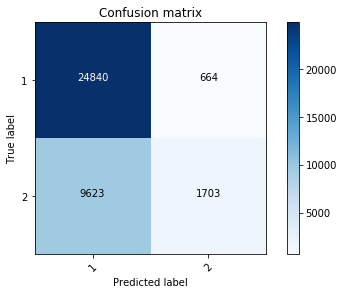

In [45]:
# Compute confusion matrix
cnf_matrix_LR = confusion_matrix(test_y, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(test_y, yhat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=[1,2],normalize= False,  title='Confusion matrix')

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_depth = 15
acc_score = np.zeros((tree_depth-1))
for n in range(1,tree_depth):
    
    #Train Model and Predict  
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(train_x,train_y)
    yhat=dtc.predict(test_x)
    acc_score[n-1] = metrics.accuracy_score(test_y, yhat)
acc_score  

array([0.69, 0.72, 0.72, 0.72, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75])

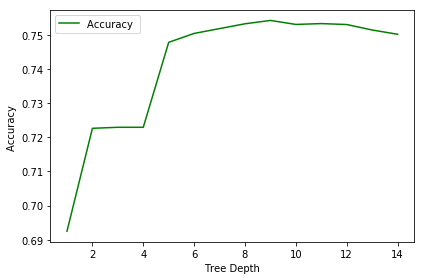

In [47]:
plt.plot(range(1,tree_depth),acc_score,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Tree Depth')
plt.tight_layout()
plt.show()

In [48]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
dTree.fit(train_x,train_y)
dTree_yhat = dTree.predict(test_x)


In [49]:
dTree_jac = jaccard_similarity_score(test_y,dTree_yhat)
dTree_m = metrics.accuracy_score(test_y,dTree_yhat)
dTree_f1 = f1_score(test_y,dTree_yhat,average='weighted')
print("Test set Accuracy: ", dTree_m)
print("F1 score : ", dTree_f1)

Test set Accuracy:  0.7541677979907684
F1 score :  0.7234606460716007


              precision    recall  f1-score   support

           1       0.76      0.94      0.84     25504
           2       0.71      0.34      0.46     11326

   micro avg       0.75      0.75      0.75     36830
   macro avg       0.74      0.64      0.65     36830
weighted avg       0.75      0.75      0.72     36830

Confusion matrix, without normalization
[[23937  1567]
 [ 7487  3839]]


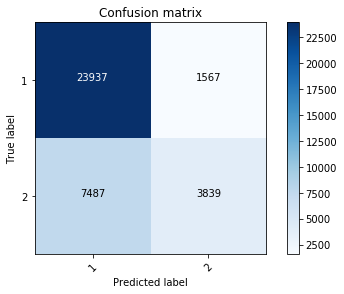

In [50]:
# Compute confusion matrix
cnf_matrix_dTree = confusion_matrix(test_y, dTree_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(test_y, dTree_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dTree, classes=[1,2],normalize= False,  title='Confusion matrix')

## Gaussian Naïve Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(train_x,train_y)
yhat_clf = clf.predict(test_x)

In [52]:
print("Test set Accuracy: ", metrics.accuracy_score(test_y,yhat_clf))
print("F1 score : ", f1_score(test_y,yhat_clf,average='weighted'))

Test set Accuracy:  0.7084170513168613
F1 score :  0.6606163810649464


              precision    recall  f1-score   support

           1       0.73      0.93      0.81     25504
           2       0.57      0.22      0.31     11326

   micro avg       0.71      0.71      0.71     36830
   macro avg       0.65      0.57      0.56     36830
weighted avg       0.68      0.71      0.66     36830

Confusion matrix, without normalization
[[23643  1861]
 [ 8878  2448]]


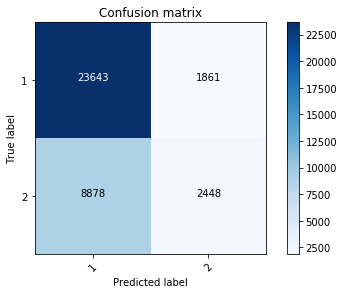

In [53]:
# Compute confusion matrix
cnf_matrix_clf = confusion_matrix(test_y, yhat_clf, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(test_y, yhat_clf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_clf, classes=[1,2],normalize= False,  title='Confusion matrix')

## Support Vector Machine

In [54]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf').fit(train_x,train_y)
yhat_svm = SVM.predict(test_x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
SVM_m = metrics.accuracy_score(test_y,yhat_svm)
SVM_f1 = f1_score(test_y,yhat_svm,average='weighted')
SVM_jac = jaccard_similarity_score(test_y,yhat_svm)
print("Test set Accuracy: ", SVM_m)
print("F1 score : ", SVM_f1)
print("Jaccard score : ", SVM_jac)

Test set Accuracy:  0.7505023079011676
F1 score :  0.7041253846941488
Jaccard score :  0.7505023079011676


              precision    recall  f1-score   support

           1       0.75      0.97      0.84     25504
           2       0.78      0.26      0.39     11326

   micro avg       0.75      0.75      0.75     36830
   macro avg       0.77      0.61      0.62     36830
weighted avg       0.76      0.75      0.70     36830

Confusion matrix, without normalization
[[24689   815]
 [ 8374  2952]]


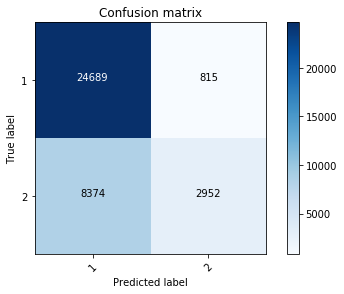

In [56]:
# Compute confusion matrix
cnf_matrix_svm = confusion_matrix(test_y, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(test_y, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=[1,2],normalize= False,  title='Confusion matrix')

## K Nearest Neighbor(KNN)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)

mean_acc

array([0.68, 0.72, 0.7 , 0.73, 0.72, 0.73, 0.72, 0.73, 0.73])

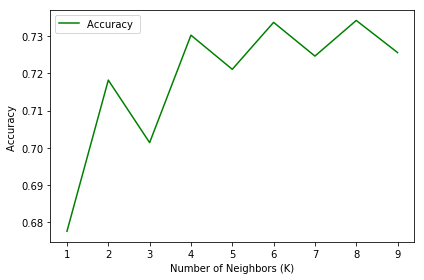

In [58]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 6).fit(train_x,train_y)
yhat_knn = KNN.predict(test_x)
metrics.accuracy_score(test_y, yhat_knn)

0.733722508824328

In [60]:
KNN_m = metrics.accuracy_score(test_y,yhat_knn)
KNN_f1 = f1_score(test_y,yhat_knn,average='weighted')
KNN_jac = jaccard_similarity_score(test_y,yhat_knn)
print("Test set Accuracy: ", KNN_m)
print("F1 score : ", KNN_f1)
print("Jaccard Score : ", KNN_jac)

Test set Accuracy:  0.733722508824328
F1 score :  0.7078885991680153
Jaccard Score :  0.733722508824328


              precision    recall  f1-score   support

           1       0.76      0.91      0.82     25504
           2       0.62      0.35      0.44     11326

   micro avg       0.73      0.73      0.73     36830
   macro avg       0.69      0.63      0.63     36830
weighted avg       0.72      0.73      0.71     36830

Confusion matrix, without normalization
[[23101  2403]
 [ 7404  3922]]


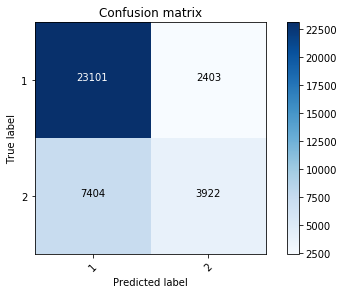

In [61]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(test_y, yhat_knn, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(test_y, yhat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=[1,2],normalize= False,  title='Confusion matrix')

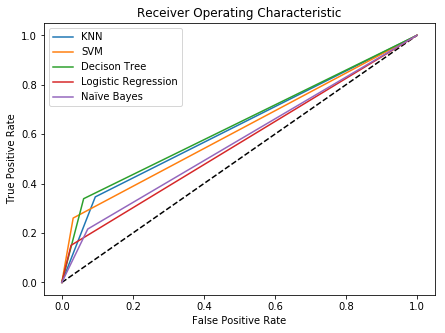

In [62]:
from sklearn.metrics import roc_curve

fpr1 , tpr1, thresholds1 = roc_curve(test_y, yhat_knn,pos_label=2)

fpr2 , tpr2, thresholds2 = roc_curve(test_y, yhat_svm,pos_label=2)


fpr3 , tpr3, thresholds3 = roc_curve(test_y, dTree_yhat,pos_label=2)

fpr4 , tpr4, thresholds4 = roc_curve(test_y, yhat_LR,pos_label=2)

fpr5 , tpr5, thresholds5 = roc_curve(test_y, yhat_clf,pos_label=2)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "SVM")
plt.plot(fpr3, tpr3, label= "Decison Tree")
plt.plot(fpr4, tpr4, label= "Logistic Regression")
plt.plot(fpr5, tpr5, label= "Naïve Bayes")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('ROC.png', dpi=100,bbox_inches = "tight")
plt.show()

In [63]:
acc_matrix = {'Algorithm':['KNN','Decision Tree','SVM','LogisticRegression'],'Jaccard':[KNN_jac,dTree_jac,SVM_jac,LR_jac],'F1-score':[KNN_f1,dTree_f1,SVM_f1,LR_f1],'LogLoss':['NA','NA','NA',LR_Log],"Accuracy":[KNN_m,dTree_m,SVM_m,LR_m]}
df_accuracy = pd.DataFrame(acc_matrix)
df_accuracy

,Algorithm,Jaccard,F1-score,LogLoss,Accuracy
0,KNN,0.733723,0.707889,NA,0.733723
1,Decision Tree,0.754168,0.723461,NA,0.754168
2,SVM,0.750502,0.704125,NA,0.750502
3,LogisticRegression,0.720690,0.650181,0.561144,0.720690
